In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [8]:

df = pd.read_csv(r'C:\Users\Ahmed Shafique\Documents\Projects\AI-in-forex-trading\Datasets\30min\Aug and Sep 30min dataset.csv', sep=',', header=None)
df.columns = ['date', 'open', 'high', 'low', 'close']
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
prices = df['close'].values.reshape(-1, 1)

In [9]:

scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
def create_lstm_data(data, time_steps=1):
    x, y = [], []
    for i in range(len(data) - time_steps):
        x.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
x, y = create_lstm_data(prices_scaled, time_steps)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

In [11]:
train_size = int(0.8 * len(x))
x_train, x_test = x[0:train_size], x[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=180, batch_size=20)
predictions = model.predict(x_test)
mse = model.evaluate(x_test, y_test)
print(f'MSE: {mse}')

Epoch 1/180
40/40 [==============================] - 3s 6ms/step - loss: 0.0598
Epoch 2/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0047
Epoch 3/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 4/180
40/40 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 5/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 6/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 7/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 8/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0032
Epoch 9/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 10/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 11/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0028
Epoch 12/180
40/40 [==============================] - 0s 6ms/step - loss: 0.0029
Epoch 13/180
40/40 [=================

In [12]:
last_prices = prices_scaled[-time_steps:]
last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))
x_pred = np.array([last_prices_scaled[-time_steps:, 0]])
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))
predicted_price_scaled = model.predict(x_pred)
predicted_price = scaler.inverse_transform(predicted_price_scaled)
print(f'Predicted price: {predicted_price}')

1/1 [==============================] - 0s 16ms/step
Predicted price: [[1.0562353]]


In [13]:
future_prices = np.zeros((10, 1))

for i in range(10):
    last_prices = prices_scaled[-time_steps:]
    last_prices_scaled = scaler.transform(last_prices.reshape(-1, 1))
    x_pred = np.array([last_prices_scaled[-time_steps:, 0]])
    x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1], 1))
    predicted_price_scaled = model.predict(x_pred)
    predicted_price = scaler.inverse_transform(predicted_price_scaled)
    future_prices[i] = predicted_price
    prices_scaled = np.vstack((prices_scaled, predicted_price_scaled))

# Print the predicted prices for the next 5 hours
print(f'Predicted prices for the next 5 hours: {future_prices}')

1/1 [==============================] - 0s 17ms/step
Predicted prices for the next 5 hours: [[1.05623531]
 [1.05922794]
 [1.0595063 ]
 [1.06007648]
 [1.06074035]
 [1.06173158]
 [1.06314218]
 [1.06495905]
 [1.06712043]
 [1.0695678 ]]


In [14]:
from sklearn.metrics import mean_absolute_error, accuracy_score

y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

y_train_binary = (y_train[1:] > y_train[:-1]).astype(int)
y_test_binary = (y_test[1:] > y_test[:-1]).astype(int)

y_pred_binary = (y_pred[1:] > y_pred[:-1]).astype(int)
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print(f'Accuracy: {accuracy * 100:.2f}%')

7/7 [==============================] - 0s 3ms/step
MSE: 0.0007209356408566236
MAE: 0.01959086510136541
RMSE: 0.026850244707574335
Accuracy: 54.55%


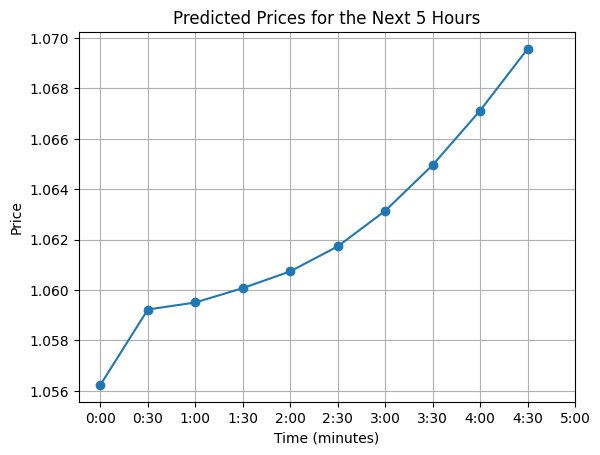

In [15]:
import matplotlib.pyplot as plt

time = np.arange(10) * 30  
plt.plot(time, future_prices, marker='o')
plt.title('Predicted Prices for the Next 5 Hours')
plt.xlabel('Time (minutes)')
plt.ylabel('Price')
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300],
           ['0:00', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00'])

plt.grid(True)
plt.show()

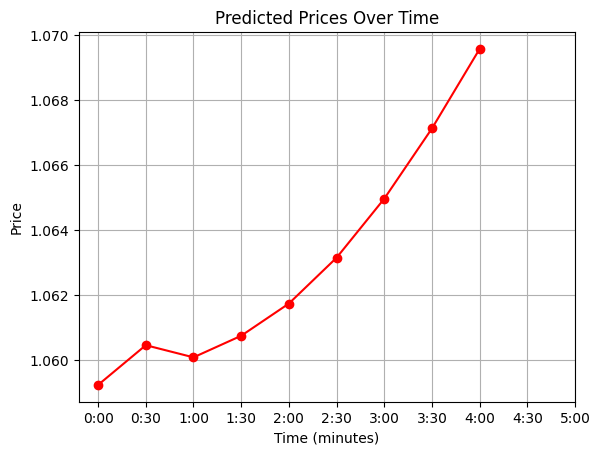

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Given price dataset
future_prices = np.array([
    [1.05922794],
    [1.06045023],
    [1.06007648],
    [1.06074035],
    [1.06173158],
    [1.06314218],
    [1.06495905],
    [1.06712043],
    [1.0695678]
]).flatten()  # Flattening to 1D array

# Time stamps for the x-axis (30-minute intervals)
time = np.arange(0, 30 * len(future_prices), 30)  # 30 minutes intervals

# Plotting the graph
plt.plot(time, future_prices, marker='o', color='r')
plt.title('Predicted Prices Over Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Price')

# Setting x-ticks to match the desired format
plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300],
           ['0:00', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00'])

plt.grid(True)
plt.show()